In [4]:
import TMA_def as tma
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [52]:
def tma_plots(model, n_samp=100):
    # Find the predicted values for the original design.
    y_hat = model.fittedvalues
    # Find the Residuals
    res = model.resid
    # Influence of the Residuals
    res_inf = model.get_influence()
    # Studentized residuals using variance from OLS
    res_standard = res_inf.resid_studentized_internal
    # Absolute square root Residuals:
    res_stand_sqrt = np.sqrt(np.abs(res_standard))
    # Cook's Distance and leverage:
    res_inf_cooks = res_inf.cooks_distance
    res_inf_leverage = res_inf.hat_matrix_diag

    """ Plots """
    # Create Figure and subplots
    fig = plt.figure(figsize = (14, 18))

    # First subplot Residuals vs Fitted values
    ax1 = fig.add_subplot(3, 2, 1)
    tma.plot_residuals(ax1, y_hat, res, title='Tukey-Anscombe plot - Residuals vs Fitted')

    # Second subplot Q-Q Plot
    ax2 = fig.add_subplot(3, 2, 2)
    tma.plot_QQ(ax2, res_standard, n_samp=n_samp, title='Normal plot or Q-Q plot')

    # Third subplot: Scale location
    ax3 = fig.add_subplot(3, 2, 3)
    tma.plot_scale_loc(ax3, y_hat, res_stand_sqrt, n_samp=n_samp, x_lab='Fitted values')

    # Fourth subplot: Cook's distance
    ax4 = fig.add_subplot(3, 2, 4)
    x_min, x_max = min(res_inf_leverage) - 0.005, max(res_inf_leverage) + 0.01
    y_min, y_max = min(res_standard) - 1, max(res_standard) + 1
    tma.plot_cooks(ax4, res_inf_leverage, res_standard, n_pred=1,
              x_lim=[x_min, x_max], y_lim=[y_min, y_max])

    ax5 = fig.add_subplot(3, 2, 5)
    res_t0 = res[:-1]
    res_t1 = res[1:]
    ax5.scatter(res_t0, res_t1)
    ax5.set_xlabel('Residual r(t)')
    ax5.set_ylabel('Residual r(t+1)')
    ax5.set_title('Lag-1-Plot')

    ax6 = fig.add_subplot(3, 2, 6)
    res_len = len(res)
    ax6.plot(range(res_len), res)
    ax6.set_xlabel('Observation')
    ax6.set_ylabel('Residual')
    ax6.set_title('Residual Observations')

    # Show plot
    # plt.tight_layout()
    plt.show()

# Exercise 2.1

The 4 assumptions of each Linear Model:

1. For the expected value of all $\epsilon_i$ we have $E[\epsilon_i] = 0$
2. The error terms $\epsilon_i$ all have the same constant variance $Var[\epsilon_i] = \sigma^2$
3. The error terms $\epsilon_i$ are normally distributed
4. The error terms $\epsilon_i$ are independent

In [53]:
df = pd.read_csv('../Data/windmill.csv')
df

,wind_speed,current
0,11.187073,1.582
1,13.424487,1.822
2,7.607209,1.057
3,6.041019,0.500
4,22.374145,2.236
5,21.702921,2.386
6,21.367309,2.294
7,6.824114,0.558
8,18.234929,2.166
9,13.871970,1.866


In [54]:
y = df.current

a) Naive

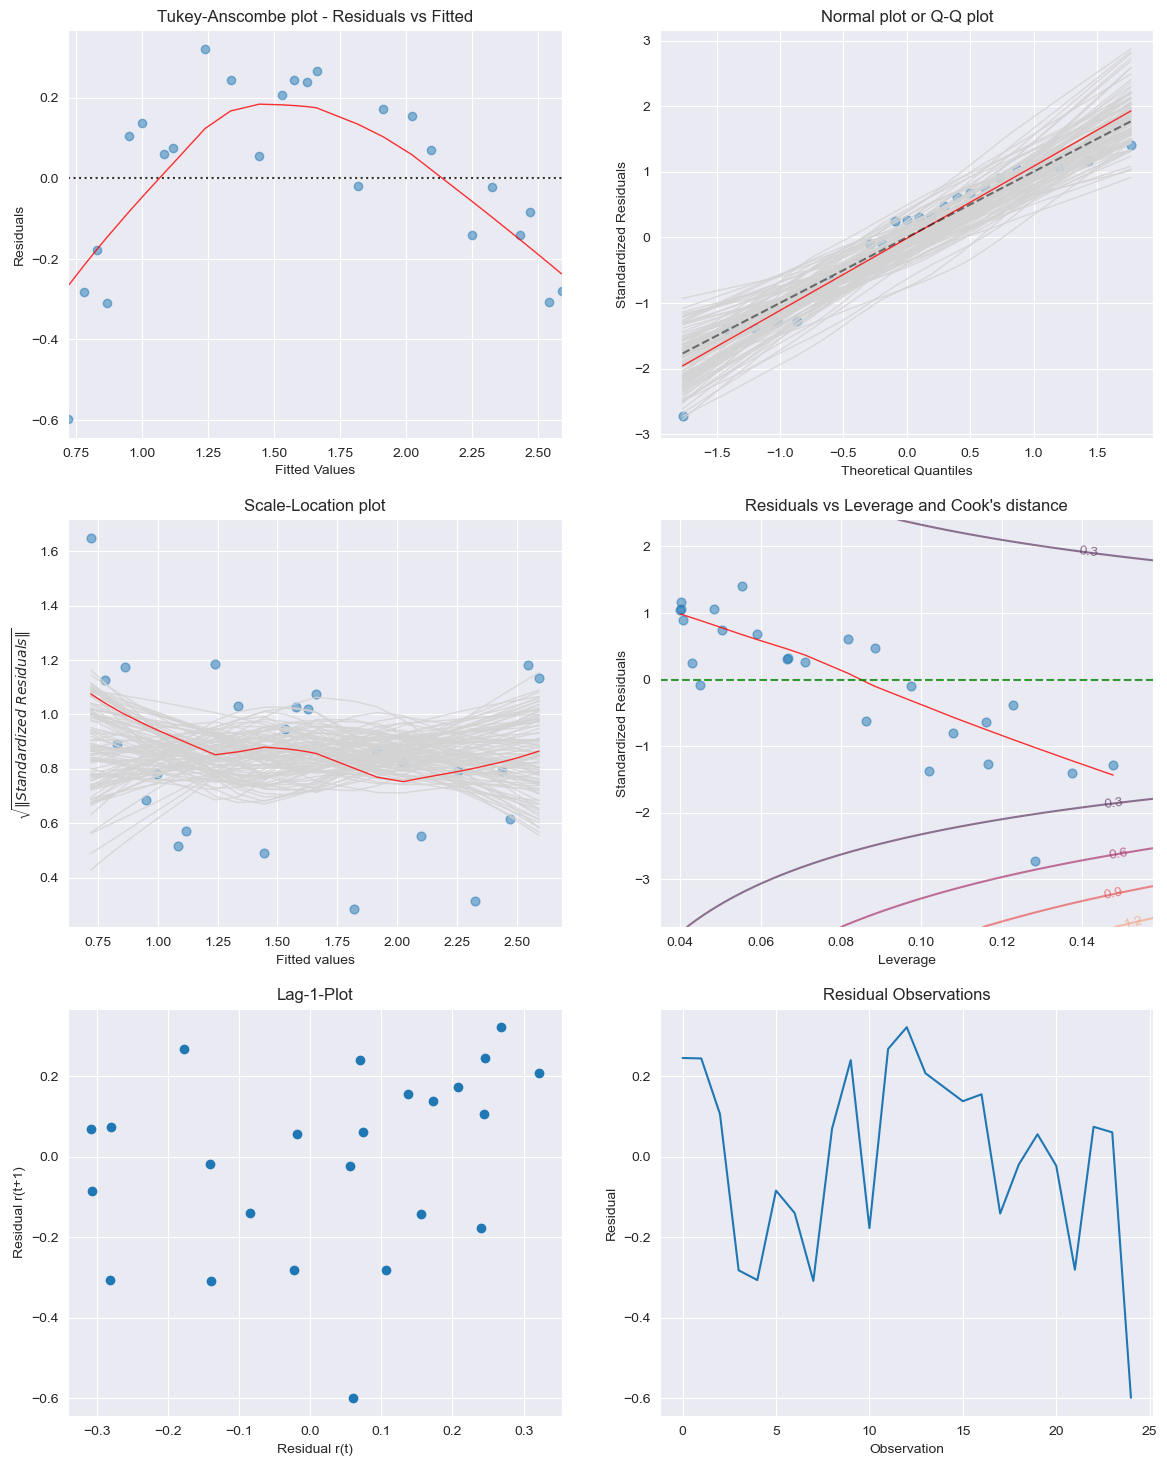

In [57]:
naive_x = sm.add_constant(df.wind_speed)
naive_model = sm.OLS(y, naive_x).fit()

tma_plots(naive_model)

1. For the expected value of all $\epsilon_i$ we have $E[\epsilon_i] = 0$:
    - ❌ The Tukey-Anscompe plot (upper-left) shows that the residuals are not equal to 0. If they were, the red line would be on the 0-axis.
2. The error terms $\epsilon_i$ all have the same constant variance $Var[\epsilon_i] = \sigma^2$
    - ✅ The Scale-Location Plot (middle-left) shows that the simulated smoothing curves do not systematically deviate from a straight line - at least in the middle. We conclude that the variances of the error terms $\epsilon_i$ are constant.
3. The error terms $\epsilon_i$ are normally distributed
    - ✅ The data points are contained in the grey band of the simulated curves in the Q-Q plot (upper right). We therefore interpret the error terms $\epsilon_i$ as normally distributed.
4. The error terms $\epsilon_i$ are independent
    - ✅ There is no pattern in neither the Lag-1-Plot nor the Residual Observation plot. Therefore we conclude that the error terms $\epsilon_i$ are independent


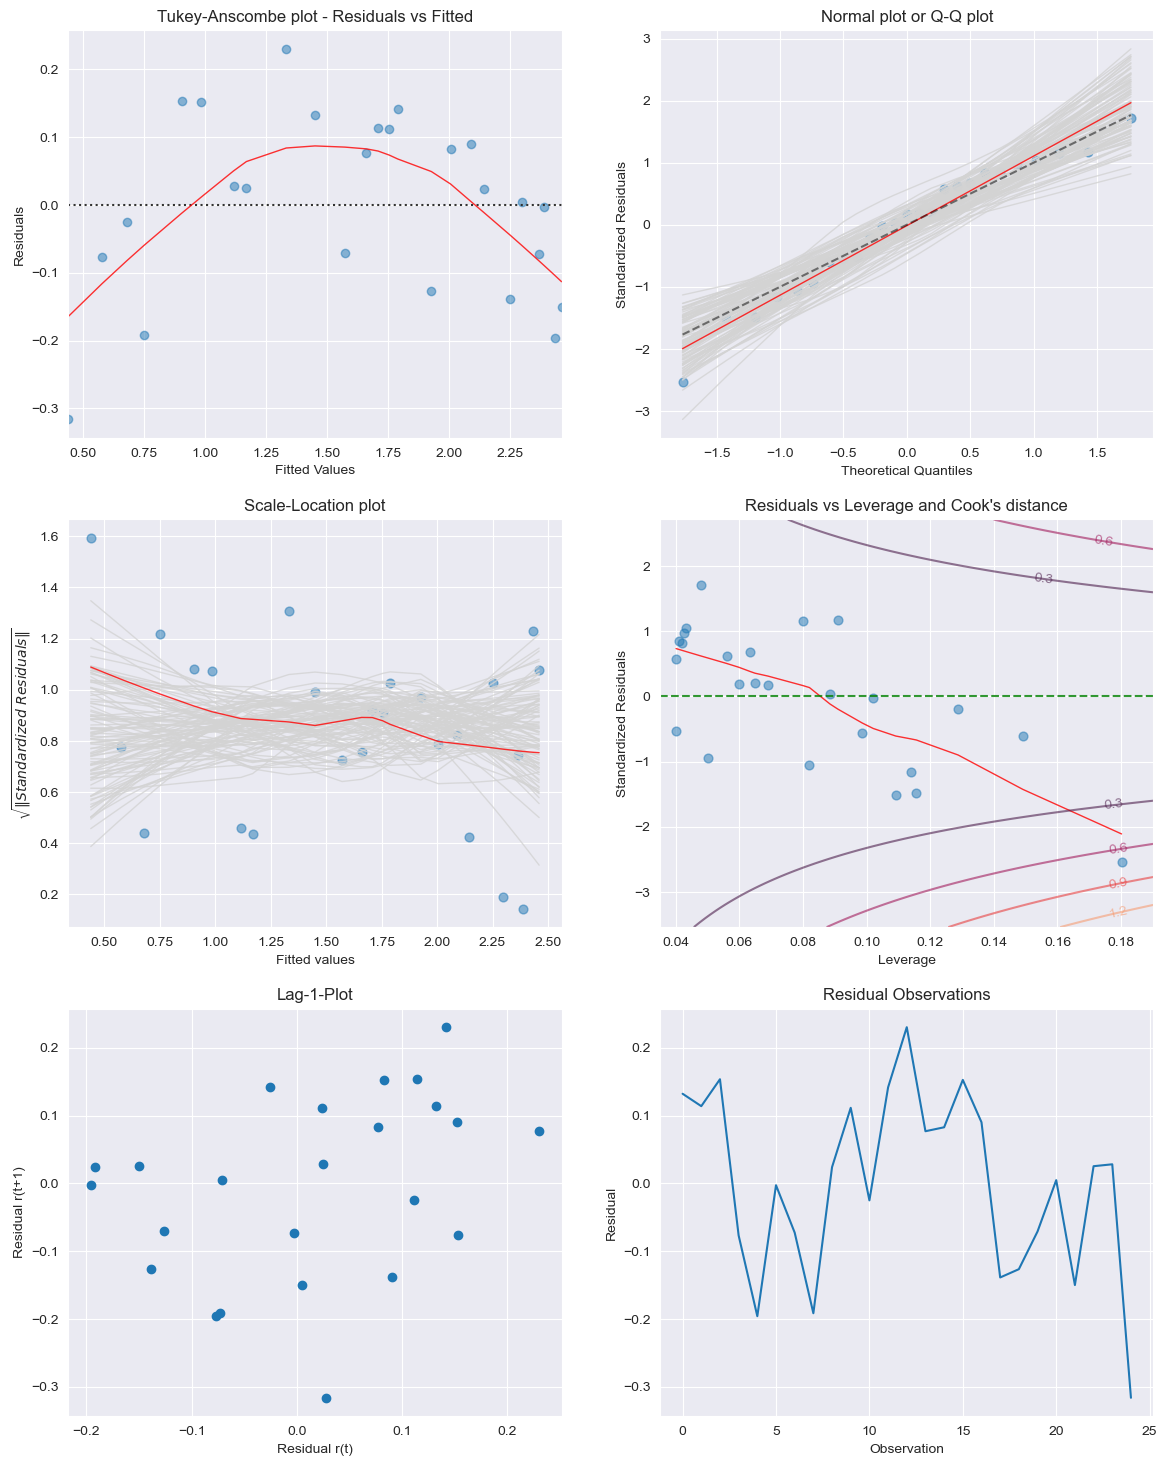

In [56]:
first_aid_x = sm.add_constant(np.log(df.wind_speed))
first_aid_model = sm.OLS(y, first_aid_x).fit()

tma_plots(first_aid_model)

1. For the expected value of all $\epsilon_i$ we have $E[\epsilon_i] = 0$:
    - ❌ The Tukey-Anscompe plot (upper-left) shows that the residuals are not equal to 0. If they were, the red line would be on the 0-axis.
2. The error terms $\epsilon_i$ all have the same constant variance $Var[\epsilon_i] = \sigma^2$
    - ✅ The Scale-Location Plot (middle-left) shows that the simulated smoothing curves do not systematically deviate from a straight line - at least in the middle. We conclude that the variances of the error terms $\epsilon_i$ are constant.
3. The error terms $\epsilon_i$ are normally distributed
    - ✅ The data points are contained in the grey band of the simulated curves in the Q-Q plot (upper right). We therefore interpret the error terms $\epsilon_i$ as normally distributed.
4. The error terms $\epsilon_i$ are independent
    - ✅ There is no pattern in neither the Lag-1-Plot nor the Residual Observation plot. Therefore we conclude that the error terms $\epsilon_i$ are independent


c) Expert Knowledge Transformation

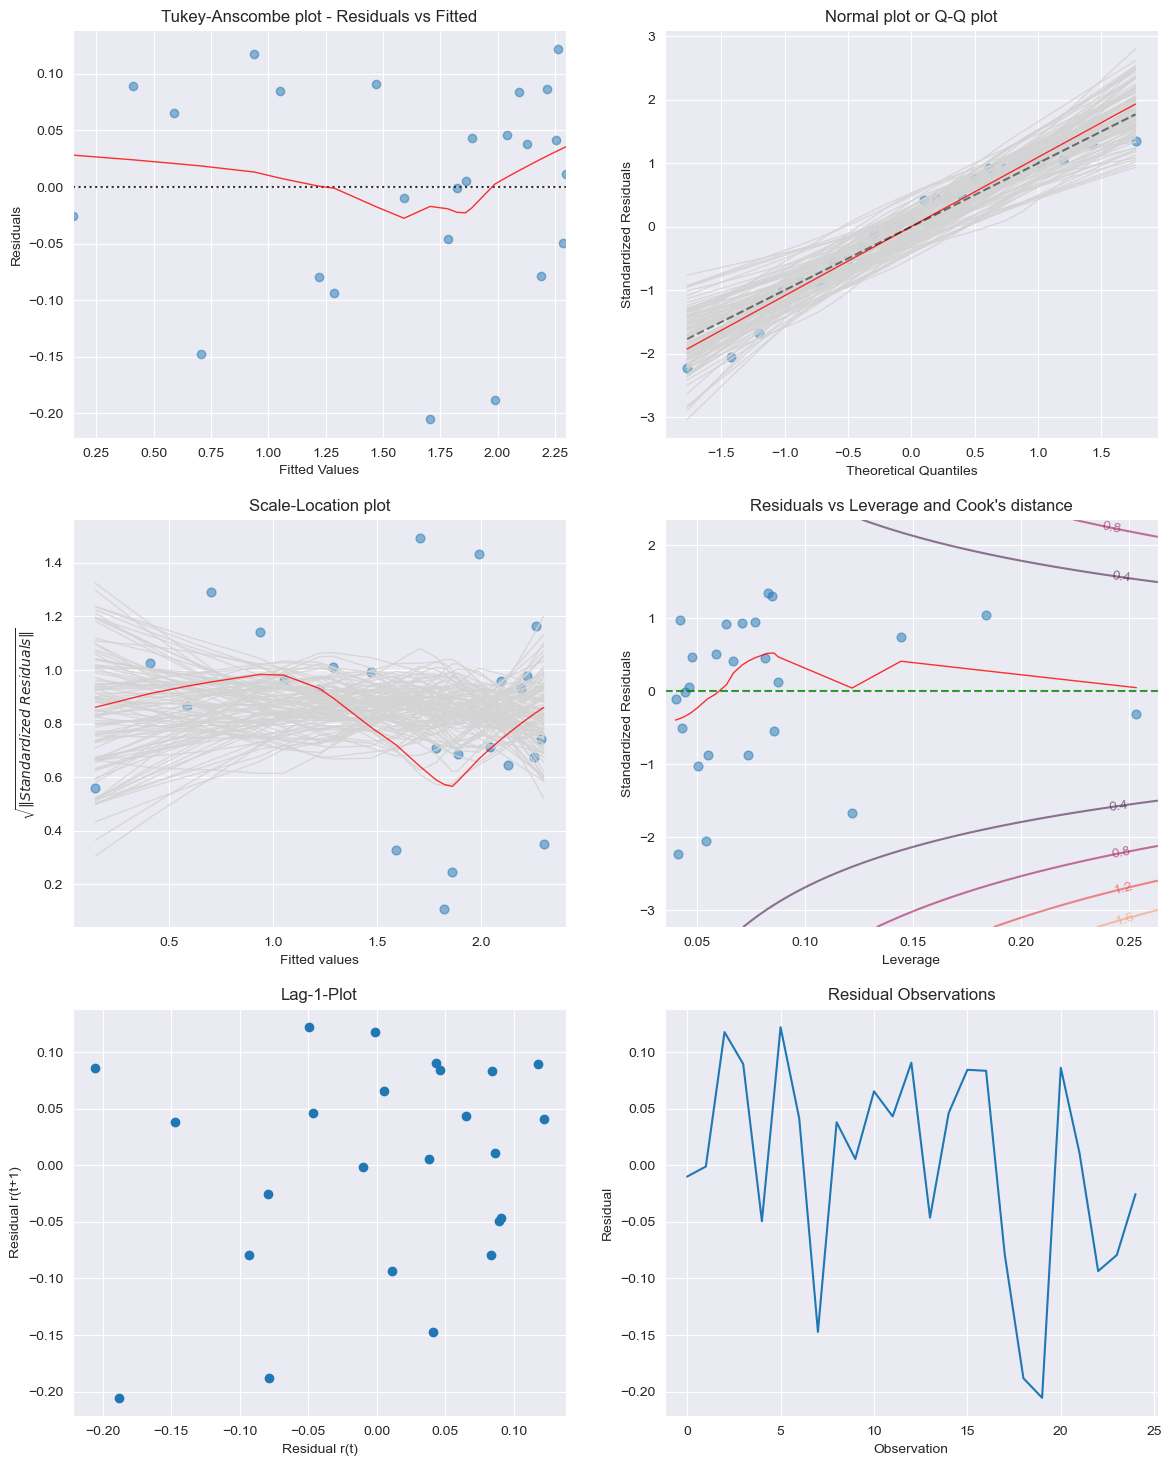

In [58]:
expert_x = sm.add_constant(1. / df.wind_speed)
expert_model = sm.OLS(y, expert_x).fit()

tma_plots(expert_model)

1. For the expected value of all $\epsilon_i$ we have $E[\epsilon_i] = 0$:
    - ✅ The Tukey-Anscompe plot (upper-left) shows that the residuals are not equal to 0. If they were, the red line would be on the 0-axis. However, it is the best fitted line out of the three models.
2. The error terms $\epsilon_i$ all have the same constant variance $Var[\epsilon_i] = \sigma^2$
    - ✅ The Scale-Location Plot (middle-left) shows that the simulated smoothing curves do not systematically deviate from a straight line - at least in the middle. We conclude that the variances of the error terms $\epsilon_i$ are constant.
3. The error terms $\epsilon_i$ are normally distributed
    - ✅ The data points are contained in the grey band of the simulated curves in the Q-Q plot (upper right). We therefore interpret the error terms $\epsilon_i$ as normally distributed.
4. The error terms $\epsilon_i$ are independent
    - ✅ There is no pattern in neither the Lag-1-Plot nor the Residual Observation plot. Therefore we conclude that the error terms $\epsilon_i$ are independent


# Exercise 2.2

In [61]:
forbes_df = pd.read_csv('../Data/Forbes.csv')
forbes_df

,y,pressure
0,194.5,20.79
1,194.3,20.79
2,197.9,22.40
3,198.4,22.67
4,199.4,23.15
5,199.9,23.35
6,200.9,23.89
7,201.1,23.99
8,201.4,24.02
9,201.3,24.01


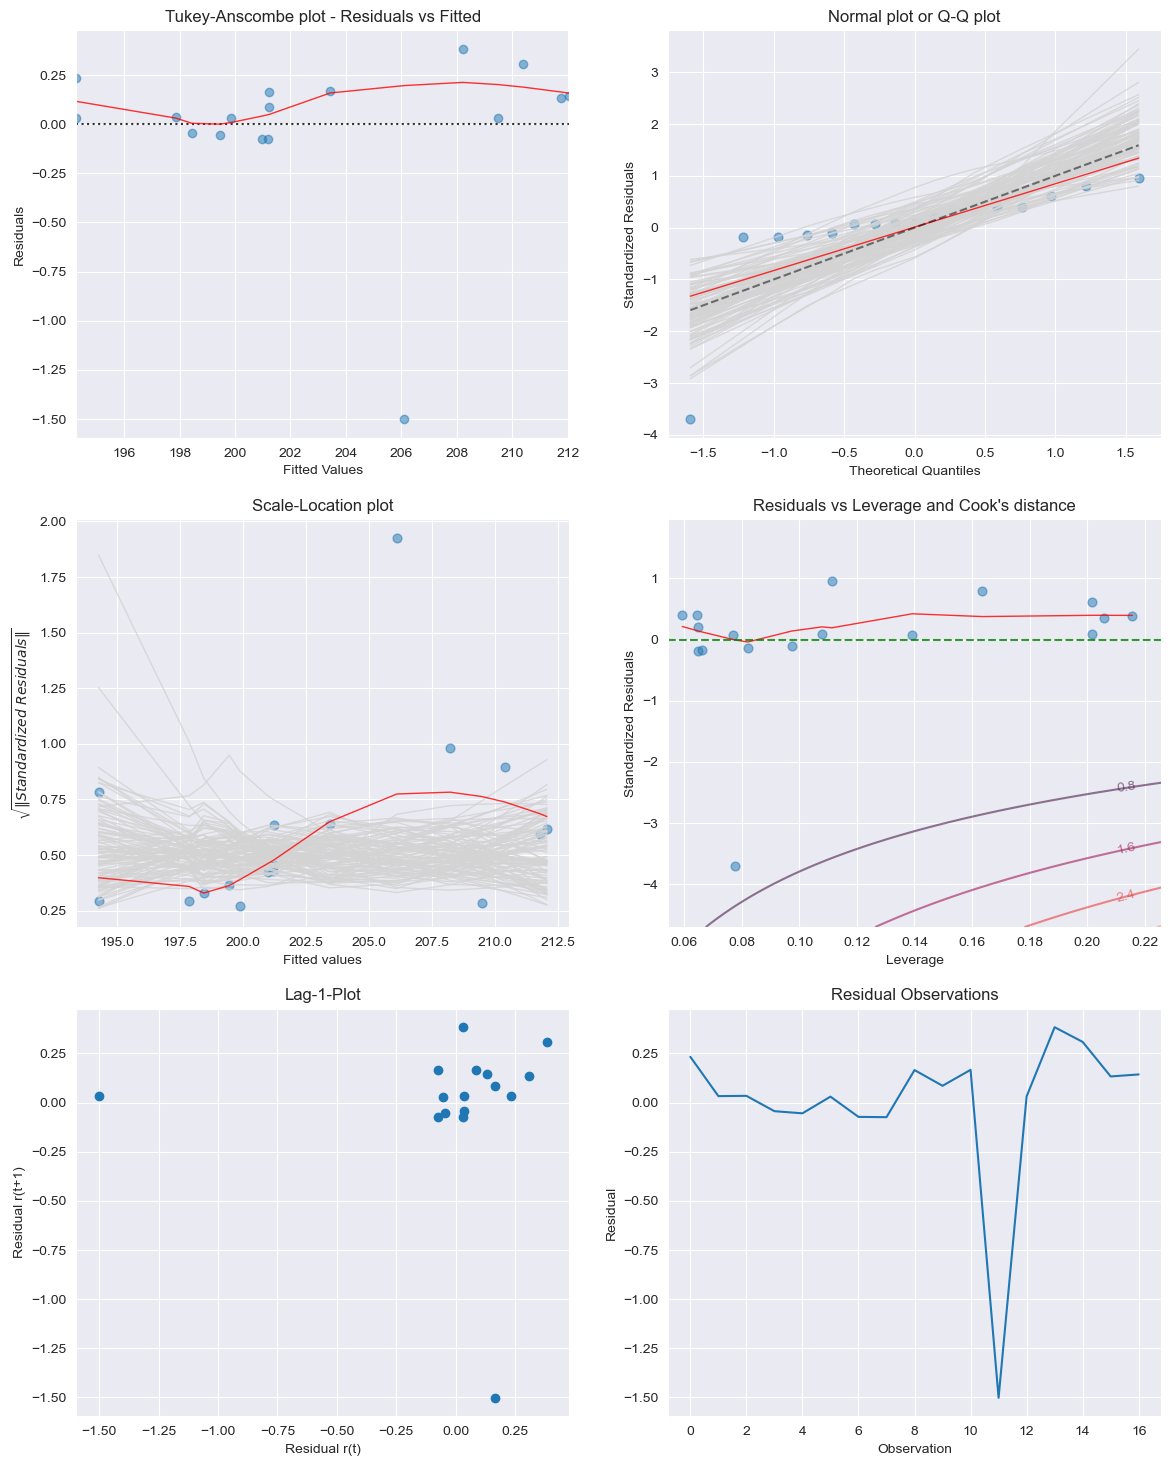

In [62]:
forbes_x = sm.add_constant(100 * np.log(forbes_df.pressure))
forbes_model = sm.OLS(forbes_df.y, forbes_x).fit()
tma_plots(forbes_model)

The assumptions of a linear regression are _not_ fulfilled because:

1. For the expected value of all $\epsilon_i$ we have $E[\epsilon_i] = 0$:
    - ✅ The Tukey-Anscompe plot (upper-left) shows that the residuals are pretty close to 0.
2. The error terms $\epsilon_i$ all have the same constant variance $Var[\epsilon_i] = \sigma^2$
    - ✅ The Scale-Location Plot (middle-left) shows that the simulated smoothing curves do not systematically deviate from a straight line. We conclude that the variances of the error terms $\epsilon_i$ are constant.
3. The error terms $\epsilon_i$ are normally distributed
    - ❌ Not all data points are contained in the grey band of the simulated curves in the Q-Q plot (upper right). It seems the error terms $\epsilon_i$ are _not_ normally distributed.
4. The error terms $\epsilon_i$ are independent
    - ❌ There is a pattern in the Lag-1-Plot and the Residual Observation plot. Therefore, we conclude that the error terms $\epsilon_i$ are _not_ independent
